In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# 拉普拉斯算子
K = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0],
])

In [3]:
def corr2d(X: np.ndarray, K: np.ndarray, padding_same=False) -> np.ndarray:
    """二维互相关运算

    Args:
        X (np.ndarray): 原图 [H, W]
        K (np.ndarray): 卷积核 [K_H, K_W]
        padding_same (bool, optional): 是否padding为原图大小. Defaults to False.

    Returns:
        np.ndarray: 互相关结果 [H, W]
    """
    X_ = X.copy()
    h, w = K.shape
    if padding_same:
        pad_width = [(h//2, h//2), (w//2, w//2)]
        X_ = np.pad(X_, pad_width=pad_width, mode="constant", constant_values=0)
    Y = np.zeros((X_.shape[0] - h + 1, X_.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X_[i:i + h, j:j + w] * K).sum()
    return Y

In [4]:
def laplacian(X: np.ndarray, K: np.ndarray):
    conv_result = corr2d(X.astype(np.float32), K.astype(np.float32), padding_same=True)
    clip_result = np.clip(conv_result, 0, 255)
    return clip_result.astype(np.uint8)

# read image

(612, 612)


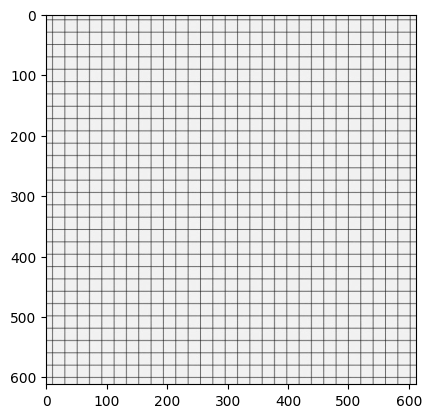

In [5]:
image = cv2.imread("../images/line.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
plt.imshow(image, cmap="gray")

# xy

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 4 ... 4 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


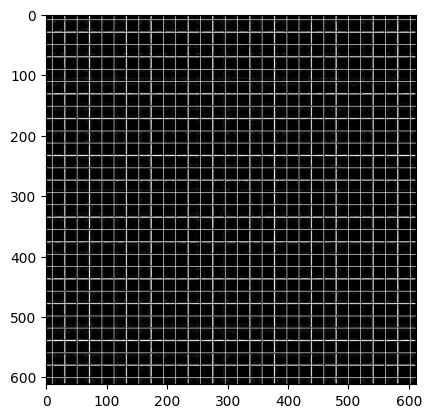

In [6]:
G_1 = cv2.Laplacian(
    src=image,
    ddepth=-1,  # 输出图像深度
    ksize=3,    # 算子大小
    scale=1,
    delta=0,
    borderType=cv2.BORDER_CONSTANT,
)
print(G_1)
plt.imshow(G_1, cmap="gray")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 2 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


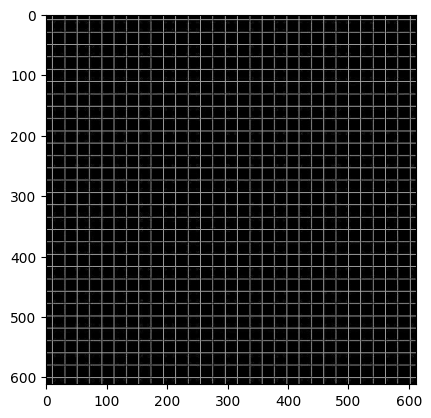

In [7]:
G_2 = laplacian(image, K)
print(G_2)
plt.imshow(G_2, cmap="gray")

In [8]:
# 复现失败
np.all(G_1 == G_2)

False